## Exercise 1

你能想到一些从序列到序列的 RNN 的应用程序吗？那么序列到向量的 RNN 和向量到序列的 RNN 呢？

**答案**：

下面是一些 RNN 的应用：

- 对于 **序列到序列** RNN：预测天气（或任何其他时间序列）、机器翻译（使用编码器-解码器架构）、视频字幕、语音到文本、音乐生成（或其他序列生成）、识别一首歌的和弦。
- 对于 **序列到向量** RNN：按音乐类型对音乐样本进行分类，分析书评的情绪，根据大脑植入物的读数预测失语症患者在想什么词，预测用户想要观看的概率基于他们的观看历史的电影（这是推荐系统协同过滤的许多可能实现之一）
- 对于 **向量到序列** RNN：图像字幕、基于当前艺术家的嵌入创建音乐播放列表、基于一组参数生成旋律、在图片中定位行人（例如，来自自拍的视频帧） 驾驶汽车的摄像头）

## Exercise 2

一个 RNN 层的输入必须有多少个维度？每个维度代表什么？那么它的输出呢？

**答案**：

一个 RNN 层必须有三维输入：第一个维度是 batch 维度（它的大小是 batch size），第二个维度代表时间（它的大小是 time step 的数量），第三个维度保存在每个 time step 的输入（其大小是每个 time step 的输入特征数）。

例如，如果您要处理包含 5 个时间序列的批次，每个时间序列有 10 个 time step，每个 time step 有 2 个值（例如，温度和风速），形状将为 \[5, 10, 2\]。

输出也是三维的，前两个维度相同，但最后一个维度等于神经元的数量。

例如，如果具有 32 个神经元的 RNN 层处理我们刚刚讨论的批次，则输出的形状将为 \[5, 10, 32\]。

## Exercise 3

如果你想构建一个序列到序列 Deep RNN，哪些 RNN 层应该有 `return_sequences=True` ？那么一个从序列到向量的 RNN 呢？

**答案**：

要使用 Keras 构建序列到序列 Deep RNN，您必须为所有 RNN 层设置 `return_sequences=True`。

要构建一个序列到向量的 RNN，您必须为所有 RNN 层设置 `return_sequences=True`，除了顶层 RNN 层，它必须有 `return_sequences=False`（或者根本不设置这个参数，因为 False 是默认值）。

## Exercise 4

假设您有一个每日的单变量时间序列，并且您希望预测接下来的七天。您应该使用哪种 RNN 架构？

**答案**：

如果你有一个每天的单变量时间序列，并且你想预测接下来的 7 天，你可以使用的最简单的 RNN 架构是堆栈 RNN 层（除顶部 RNN 层外，所有层都具有 `return_sequences=True`），使用输出 RNN 层有七个神经元。然后，您可以使用时间序列中的随机窗口训练此模型（例如，连续 30 天的序列作为输入，包含接下来 7 天的值的向量作为目标）。这是一个序列到向量的 RNN。

或者，您可以为所有 RNN 层设置 `return_sequences=True` 以创建序列到序列 RNN。您可以使用时间序列中的随机窗口训练此模型，使用与输入长度相同的序列作为目标。每个目标序列每个 time step 应该有七个值（例如，对于 time step $t$，目标应该是一个包含 time step $t+1$ 到 $t+7$ 的值的向量）。

## Exercise 5

训练 RNN 时的主要困难是什么？你该怎么处理呢？

**答案**：

训练 RNN 时的两个主要困难是不稳定的梯度（爆炸或消失）和非常有限的短期记忆。在处理长序列时，这些问题都会变得更糟。为了缓解不稳定的梯度问题，您可以使用较小的学习率，使用双曲正切（默认）等饱和激活函数，并可能在每个 time step 使用梯度裁剪、层归一化或 dropout 。要解决有限的短期记忆问题，您可以使用 LSTM 或 GRU 层（这也有助于解决不稳定的梯度问题）。

## Exercise 6

你能描绘出 LSTM 单元的架构吗？

**答案**：

LSTM 单元的架构看起来很复杂，但如果你理解了底层逻辑，其实并不难。单元有一个短期状态向量和一个长期状态向量。在每个 time step ，输入和之前的短期状态被送到一个简单的 RNN 单元和三个门：**forget gate** 决定从长期状态中删除什么，**input gate** 决定简单的RNN单元输出的哪一部分应该被添加到长期状态，**output gate** 决定在这个 time step 应该输出长期状态的哪一部分（经过 tanh 激活函数之后）。新的短期状态等于单元的输出。

## Exercise 7

为什么要在 RNN 中使用一维卷积层？

**答案**：

RNN 层基本上是顺序的：为了计算 time step $t$ 的输出，它必须首先计算所有较早 time step 的输出。这使得无法并行化。另一方面，一维卷积层非常适合并行化，因为它不保持 time step 之间的状态。换句话说，它没有记忆：任何 time step 的输出都可以仅根据输入值的一个小窗口计算，而无需知道所有过去的值。此外，由于 1D 卷积层不是循环的，因此它较少受到不稳定梯度的影响。一个或多个一维卷积层在 RNN 中可用于有效地预处理输入，例如降低它们的时间分辨率（下采样），从而帮助 RNN 层检测长期模式。事实上，可以只使用卷积层，例如通过构建 WaveNet 架构。

## Exercise 8

你可以使用哪个神经网络架构来分类视频？

**答案**：

要根据视频的视觉内容对视频进行分类，一种可能的架构可能是每秒拍摄（比如说）一帧，然后通过相同的卷积神经网络运行每一帧（例如，预训练 Xception 模型，如果您的数据集不大，则可能会冻结)，将 CNN 的输出序列提供给序列到向量的 RNN ，最后通过 softmax 层运行其输出，为您提供所有类概率。

对于训练，您将使用交叉熵作为成本函数。如果你也想使用音频进行分类，你可以使用堆栈跨步的一维卷积层来将时间分辨率从每秒数千个音频帧降低到每秒一个（以匹配每秒图像的数量），并将输出序列连接到序列到向量 RNN 的输入（沿着最后一个维度）。

## Exercise 9

训练一个针对 SketchRNN 数据集的分类模型，可在张量流数据集中获得。

**答案**：

该数据集在 TFDS 中尚不可用，PR 仍在进行中。幸运的是，数据可以作为 TFRecords 方便地获得，所以让我们下载它（可能需要一段时间，因为它大约 1 GB 大，有 3,450,000 个训练草图和 345,000 个测试草图）：

In [2]:
import tensorflow as tf

tf_download_root = "http://download.tensorflow.org/data/"

filename = "quickdraw_tutorial_dataset_v1.tar.gz"

filepath = tf.keras.utils.get_file(filename,
                                   tf_download_root + filename,
                                   cache_dir=".",
                                   extract=True)

1065301781/1065301781 [==============================] - 234s 0us/step


In [4]:
from pathlib import Path

quickdraw_dir = Path(filepath).parent

train_files = sorted(
    [str(path) for path in quickdraw_dir.glob("training.tfrecord-*")]
)

eval_files = sorted(
    [str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")]
)

In [5]:
train_files

['datasets\\training.tfrecord-00000-of-00010',
 'datasets\\training.tfrecord-00001-of-00010',
 'datasets\\training.tfrecord-00002-of-00010',
 'datasets\\training.tfrecord-00003-of-00010',
 'datasets\\training.tfrecord-00004-of-00010',
 'datasets\\training.tfrecord-00005-of-00010',
 'datasets\\training.tfrecord-00006-of-00010',
 'datasets\\training.tfrecord-00007-of-00010',
 'datasets\\training.tfrecord-00008-of-00010',
 'datasets\\training.tfrecord-00009-of-00010']

In [6]:
eval_files

['datasets\\eval.tfrecord-00000-of-00010',
 'datasets\\eval.tfrecord-00001-of-00010',
 'datasets\\eval.tfrecord-00002-of-00010',
 'datasets\\eval.tfrecord-00003-of-00010',
 'datasets\\eval.tfrecord-00004-of-00010',
 'datasets\\eval.tfrecord-00005-of-00010',
 'datasets\\eval.tfrecord-00006-of-00010',
 'datasets\\eval.tfrecord-00007-of-00010',
 'datasets\\eval.tfrecord-00008-of-00010',
 'datasets\\eval.tfrecord-00009-of-00010']

In [7]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()
    
with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

In [8]:
assert train_classes == test_classes

class_names = [name.strip().lower() for name in train_classes]

In [9]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [10]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths, labels

In [11]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                      n_parse_threads=5, n_read_threads=5, cache=False):
    dataset = tf.data.TFRecordDataset(filepaths,
                                      num_parallel_reads=n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
    return dataset.prefetch(1)

In [13]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [14]:
for sketches, lengths, labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[ 0.0627451   0.11016953  0.        ]
  [ 0.09019608  0.08050847  0.        ]
  [ 0.09803922  0.05508476  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.02109706 -0.1372549   0.        ]
  [-0.00421941 -0.25490198  0.        ]
  [-0.01687759 -0.05490196  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.14516129  0.05490196  0.        ]
  [-0.02419355  0.04313725  0.        ]
  [ 0.02419355  0.0784314   0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.09803922  0.15566039  0.        ]
  [ 0.01960784  0.00471699  0.        ]
  [ 0.07843138  0.0990566   0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

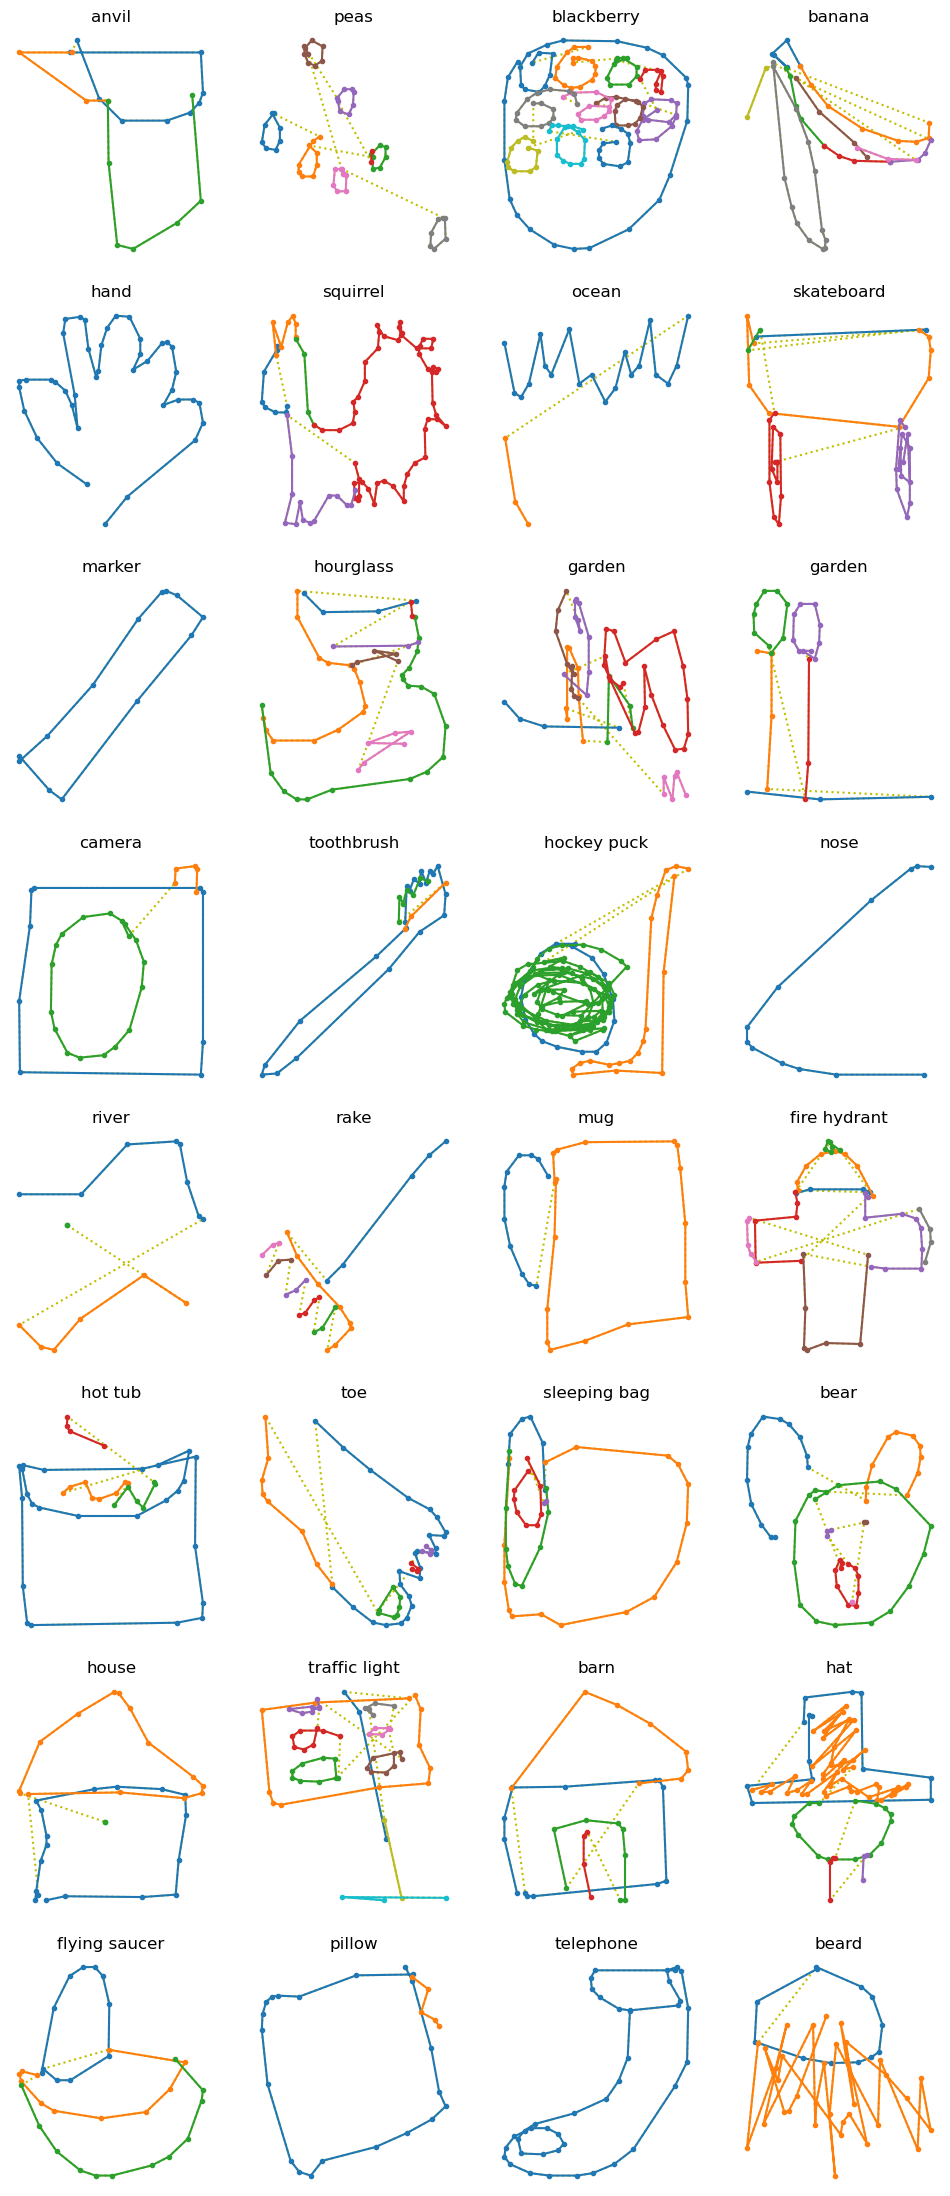

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = sketch[:, :2].cumsum(axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

大多数草图由少于 100 个点组成：

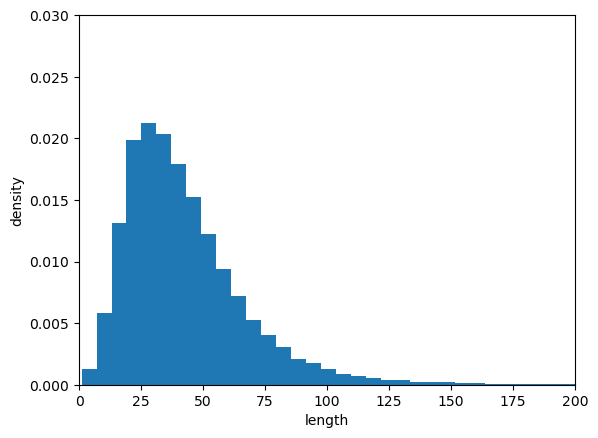

In [18]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths, bins=150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("length")
plt.ylabel("density")
plt.show()

In [19]:
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy", "sparse_top_k_categorical_accuracy"])
history = model.fit(cropped_train_set, epochs=2,
                    validation_data=cropped_valid_set)

Epoch 1/2
107813/107813 [==============================] - 1366s 13ms/step - loss: 4.1252 - accuracy: 0.1626 - sparse_top_k_categorical_accuracy: 0.3635 - val_loss: 3.1045 - val_accuracy: 0.3084 - val_sparse_top_k_categorical_accuracy: 0.5894
Epoch 2/2
 29410/107813 [=======>......................] - ETA: 16:15 - loss: 2.9491 - accuracy: 0.3346 - sparse_top_k_categorical_accuracy: 0.6215

In [21]:
y_test = np.concatenate([labels for _, _, labels in test_set])
y_probas = model.predict(test_set)

In [22]:
np.mean(tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))

In [23]:
n_new = 10
Y_probas = model.predict(sketches)
top_k = tf.nn.top_k(Y_probas, k=5)
for index in range(n_new):
    plt.figure(figsize=(3, 3.5))
    draw_sketch(sketches[index])
    plt.show()
    print("Top-5 predictions:".format(index + 1))
    for k in range(5):
        class_name = class_names[top_k.indices[index, k]]
        proba = 100 * top_k.values[index, k]
        print("  {}. {} {:.3f}%".format(k + 1, class_name, proba))
    print("Answer: {}".format(class_names[labels[index].numpy()]))


In [24]:
model.save("my_sketchrnn", save_format="tf")

## Exercise 10

下载 Bach chorales 数据集并解压缩。它由约翰·塞巴斯蒂安·巴赫创作的 382 首赞美诗组成。每个 chorale 的长度为 100 到 640 个 time step，每个 time step 包含 4 个整数，其中每个整数对应钢琴上的音符索引（值 0 除外，这意味着没有音符被演奏）。训练一个可以预测下一个 time step（四个音符）的模型（循环模型、卷积模型或两者），给定来自合唱团的一系列时间步长。然后使用此模型生成类似巴赫的音乐，一次一个音符：您可以通过给模型一个合唱的开始并要求它预测下一个时间步长，然后将这些时间步长附加到输入序列并向模型询问下一个音符，等等。还要确保查看 Google 的 Coconet 模型，该模型曾用于关于巴赫的精美 Google 涂鸦。

**答案**：

In [25]:
tf.keras.utils.get_file(
    "jsb_chorales.tgz",
    "https://github.com/ageron/data/raw/main/jsb_chorales.tgz",
    cache_dir=".",
    extract=True)

In [26]:
jsb_chorales_dir = Path("datasets/jsb_chorales")
train_files = sorted(jsb_chorales_dir.glob("train/chorale_*.csv"))
valid_files = sorted(jsb_chorales_dir.glob("valid/chorale_*.csv"))
test_files = sorted(jsb_chorales_dir.glob("test/chorale_*.csv"))

In [27]:
import pandas as pd

def load_chorales(filepaths):
    return [pd.read_csv(filepath).values.tolist() for filepath in filepaths]

train_chorales = load_chorales(train_files)
valid_chorales = load_chorales(valid_files)
test_chorales = load_chorales(test_files)

In [28]:
train_chorales[0]

音符范围从 36（C1 = C 在八度音阶 1）到 81（A5 = A 在八度音阶 5），加上 0 表示静音：

In [29]:
notes = set()
for chorales in (train_chorales, valid_chorales, test_chorales):
    for chorale in chorales:
        for chord in chorale:
            notes |= set(chord)

n_notes = len(notes)
min_note = min(notes - {0})
max_note = max(notes)

assert min_note == 36
assert max_note == 81

让我们写几个函数来听这些合唱（你不需要了解这里的细节，事实上肯定有更简单的方法可以做到这一点，例如使用 MIDI 播放器，但我只是想找点乐子 编写合成器）：

In [30]:
from IPython.display import Audio

def notes_to_frequencies(notes):
    # Frequency doubles when you go up one octave; there are 12 semi-tones
    # per octave; Note A on octave 4 is 440 Hz, and it is note number 69.
    return 2 ** ((np.array(notes) - 69) / 12) * 440

def frequencies_to_samples(frequencies, tempo, sample_rate):
    note_duration = 60 / tempo # the tempo is measured in beats per minutes
    # To reduce click sound at every beat, we round the frequencies to try to
    # get the samples close to zero at the end of each note.
    frequencies = (note_duration * frequencies).round() / note_duration
    n_samples = int(note_duration * sample_rate)
    time = np.linspace(0, note_duration, n_samples)
    sine_waves = np.sin(2 * np.pi * frequencies.reshape(-1, 1) * time)
    # Removing all notes with frequencies ≤ 9 Hz (includes note 0 = silence)
    sine_waves *= (frequencies > 9.).reshape(-1, 1)
    return sine_waves.reshape(-1)

def chords_to_samples(chords, tempo, sample_rate):
    freqs = notes_to_frequencies(chords)
    freqs = np.r_[freqs, freqs[-1:]] # make last note a bit longer
    merged = np.mean([frequencies_to_samples(melody, tempo, sample_rate)
                     for melody in freqs.T], axis=0)
    n_fade_out_samples = sample_rate * 60 // tempo # fade out last note
    fade_out = np.linspace(1., 0., n_fade_out_samples)**2
    merged[-n_fade_out_samples:] *= fade_out
    return merged

def play_chords(chords, tempo=160, amplitude=0.1, sample_rate=44100, filepath=None):
    samples = amplitude * chords_to_samples(chords, tempo, sample_rate)
    if filepath:
        from scipy.io import wavfile
        samples = (2**15 * samples).astype(np.int16)
        wavfile.write(filepath, sample_rate, samples)
        return display(Audio(filepath))
    else:
        return display(Audio(samples, rate=sample_rate))

现在让我们来听几首赞美诗：

In [31]:
for index in range(3):
    play_chords(train_chorales[index])

为了能够生成新的赞美诗，我们想要训练一个模型，该模型可以在给定所有先前和弦的情况下预测下一个和弦。如果我们天真地尝试一次预测下一个和弦，一次预测所有 4 个音符，我们就有可能得到不能很好地结合在一起的音符（相信我，我试过了）。一次预测一个音符要好得多，也更简单。因此，我们需要对每首合唱进行预处理，将每个和弦转换为琶音（即，一系列音符而不是同时演奏的音符）。所以每个赞美诗都是一长串音符（而不是和弦），我们可以训练一个模型，它可以在给定所有先前音符的情况下预测下一个音符。我们将使用一种序列到序列的方法，我们将一个窗口提供给神经网络，它会尝试预测同一个窗口向未来移动一个时间步长。

我们还将移动值，使它们的范围从 0 到 46，其中 0 代表静音，值 1 到 46 代表音符 36 (C1) 到 81 (A5)。

我们将在 128 个音符（即 32 个和弦）的窗口上训练模型。

由于数据集适合内存，我们可以使用我们喜欢的任何 Python 代码对 RAM 中的赞美诗进行预处理，但我将在此处演示如何使用 tf.data 进行所有预处理（将有更多关于使用 tf.data 创建窗口的详细信息 下一章）。

In [32]:
def create_target(batch):
    X = batch[:, :-1]
    Y = batch[:, 1:] # predict next note in each arpegio, at each step
    return X, Y

def preprocess(window):
    window = tf.where(window == 0, window, window - min_note + 1) # shift values
    return tf.reshape(window, [-1]) # convert to arpegio

def bach_dataset(chorales, batch_size=32, shuffle_buffer_size=None,
                 window_size=32, window_shift=16, cache=True):
    def batch_window(window):
        return window.batch(window_size + 1)

    def to_windows(chorale):
        dataset = tf.data.Dataset.from_tensor_slices(chorale)
        dataset = dataset.window(window_size + 1, window_shift, drop_remainder=True)
        return dataset.flat_map(batch_window)

    chorales = tf.ragged.constant(chorales, ragged_rank=1)
    dataset = tf.data.Dataset.from_tensor_slices(chorales)
    dataset = dataset.flat_map(to_windows).map(preprocess)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(create_target)
    return dataset.prefetch(1)

现在让我们创建训练集、验证集和测试集：

In [33]:
train_set = bach_dataset(train_chorales, shuffle_buffer_size=1000)
valid_set = bach_dataset(valid_chorales)
test_set = bach_dataset(test_chorales)

现在让我们创建模型：

- 我们可以将音符值作为浮点数直接提供给模型，但这可能不会产生好的结果。事实上，音符之间的关系并不是那么简单：例如，如果将 C3 替换为 C4，即使这些音符相隔 12 个半音（即一个八度），旋律仍然听起来不错。相反，如果您将 C3 替换为 C#3，尽管这些音符彼此相邻，但和弦很可能听起来很糟糕。因此，我们将使用嵌入层将每个音符转换为小型矢量表示（有关嵌入的更多详细信息，请参阅第 16 章）。我们将使用 5 维嵌入，因此第一层的输出形状为 \[batch_size, window_size, 5\] 。
- 然后，我们将把这些数据提供给一个类似 WaveNet 的小型神经网络，该网络由一堆 4 个 Conv1D 层组成，扩张率加倍。我们将在这些层中穿插 BatchNormalization 层，以实现更快更好的收敛。
- 然后是一个 LSTM 层来尝试捕捉长期模式。
- 最后是一个 Dense 层来产生最终的音符概率。它将为批次中的每个合唱、每个时间步长和每个可能的音符（包括静音）预测一个概率。所以输出形状将为 \[batch_size, window_size, 47\]。

In [34]:
n_embedding_dims = 5

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=n_notes, output_dim=n_embedding_dims,
                           input_shape=[None]),
    tf.keras.layers.Conv1D(32, kernel_size=2, padding="causal", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(48, kernel_size=2, padding="causal", activation="relu", dilation_rate=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, kernel_size=2, padding="causal", activation="relu", dilation_rate=4),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(96, kernel_size=2, padding="causal", activation="relu", dilation_rate=8),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dense(n_notes, activation="softmax")
])

model.summary()

现在我们准备好编译和训练模型了

In [36]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model.fit(train_set, epochs=20, validation_data=valid_set)

没有做过太多的超参数搜索，所以现在可以随意迭代这个模型并尝试优化它。例如，您可以尝试删除 LSTM 层并将其替换为 Conv1D 层。您还可以使用层数、学习率、优化器等。

一旦您对模型在验证集上的表现感到满意，您可以保存它并在测试集上最后一次评估它：

In [37]:
model.save("my_bach_model", save_format="tf")
model.evaluate(test_set)

注意：在这个练习中没有真正需要测试集，因为我们将通过听模型产生的音乐来进行最终评估。所以如果你愿意，你可以将测试集添加到训练集中，并再次训练模型，希望得到稍微好一点的模型。

现在让我们编写一个函数来生成新的赞美诗。我们将给它一些种子和弦，它会将它们转换为琶音（模型预期的格式），并使用该模型预测下一个音符，然后是下一个音符，依此类推。最后，它将音符 4 乘 4 分组以再次创建和弦，并返回生成的合唱。

In [38]:
def generate_chorale(model, seed_chords, length):
    arpegio = preprocess(tf.constant(seed_chords, dtype=tf.int64))
    arpegio = tf.reshape(arpegio, [1, -1])
    for chord in range(length):
        for note in range(4):
            next_note = model.predict(arpegio, verbose=0).argmax(axis=-1)[:1, -1:]
            arpegio = tf.concat([arpegio, next_note], axis=1)
    arpegio = tf.where(arpegio == 0, arpegio, arpegio + min_note - 1)
    return tf.reshape(arpegio, shape=[-1, 4])

为了测试这个功能，我们需要一些种子和弦。让我们使用其中一首测试赞美诗的前 8 个和弦（它实际上只是 2 个不同的和弦，每个和弦演奏 4 次）：

In [39]:
seed_chords = test_chorales[2][:8]
play_chords(seed_chords, amplitude=0.2)

现在我们准备好生成我们的第一个合唱了！让我们要求函数再生成 56 个和弦，总共 64 个和弦，即 16 个小节（假设每个小节 4 个和弦，即 4/4 签名）：

In [40]:
new_chorale = generate_chorale(model, seed_chords, 56)
play_chords(new_chorale)

这种方法有一个主要缺陷：它通常过于保守。事实上，模型不会冒任何风险，它总是会选择得分最高的音符，并且由于重复前一个音符通常听起来不错，这是风险最小的选项，因此算法会倾向于使音符持续时间越来越长。很无聊。另外，如果多次运行该模型，它总是会生成相同的旋律。

所以让我们来点有趣的东西吧！我们不会总是选择得分最高的音符，而是根据预测的概率随机选择下一个音符。例如，如果模型预测 C3 的概率为 75%，G3 的概率为 25%，那么我们将以这些概率随机选择这两个音符之一。我们还将添加一个温度参数，用于控制我们希望系统感受到的“热”（即大胆）程度。高温将使预测的概率更接近，降低可能音符的概率并增加不太可能的音符的概率。

In [41]:
def generate_chorale_v2(model, seed_chords, length, temperature=1):
    arpegio = preprocess(tf.constant(seed_chords, dtype=tf.int64))
    arpegio = tf.reshape(arpegio, [1, -1])
    for chord in range(length):
        for note in range(4):
            next_note_probas = model.predict(arpegio)[0, -1:]
            rescaled_logits = tf.math.log(next_note_probas) / temperature
            next_note = tf.random.categorical(rescaled_logits, num_samples=1)
            arpegio = tf.concat([arpegio, next_note], axis=1)
    arpegio = tf.where(arpegio == 0, arpegio, arpegio + min_note - 1)
    return tf.reshape(arpegio, shape=[-1, 4])

让我们使用这个新函数生成 3 个合唱：一个冷的、一个中等的和一个热的（随意试验其他种子、长度和温度）。 该代码将每个赞美诗保存到一个单独的文件中。 您可以一遍又一遍地运行这些单元格，直到生成杰作！

请在 Twitter @aureliengeron 上与我分享你生成的最美丽的赞美诗，我将不胜感激！ :))

In [42]:
new_chorale_v2_cold = generate_chorale_v2(model, seed_chords, 56, temperature=0.8)
play_chords(new_chorale_v2_cold, filepath="bach_cold.wav")

In [43]:
new_chorale_v2_medium = generate_chorale_v2(model, seed_chords, 56, temperature=1.0)
play_chords(new_chorale_v2_medium, filepath="bach_medium.wav")

In [44]:
new_chorale_v2_hot = generate_chorale_v2(model, seed_chords, 56, temperature=1.5)
play_chords(new_chorale_v2_hot, filepath="bach_hot.wav")

最后，您可以尝试一个有趣的社交实验：向您的朋友发送一些您最喜欢的生成的赞美诗，加上真正的赞美诗，让他们猜猜哪一个是真的！

In [45]:
play_chords(test_chorales[2][:64], filepath="bach_test_4.wav")